In [10]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA

In [11]:
pd.set_option('max_rows', 200)
pd.set_option('max_columns', None)

In [12]:
FILE_NAME = "data_banknote_authentication.txt"
SEED = 123

In [13]:
columns = ["var","skewness","curtosis","entropy","class"]
df = pd.read_csv(FILE_NAME,index_col=False, names = columns)

In [14]:
df.head()

,var,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<AxesSubplot:>

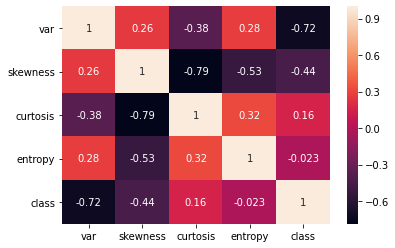

In [15]:
corr = df.corr()
sns.heatmap(corr, annot = True)

- calculate VIF to see the presence of multi-collinearity

In [16]:
df.head()

,var,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [17]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [18]:

from sklearn.preprocessing import StandardScaler
X_sd = StandardScaler().fit_transform(X)


In [19]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00072939  0.26421811 -0.38112776  0.2770186 ]
 [ 0.26421811  1.00072939 -0.78746918 -0.52670474]
 [-0.38112776 -0.78746918  1.00072939  0.31907345]
 [ 0.2770186  -0.52670474  0.31907345  1.00072939]]
Eigenvectors 
[[-0.24877213 -0.75459093  0.60346443  0.06734722]
 [-0.6393234   0.05034037 -0.11596089 -0.75847512]
 [ 0.6127065   0.1534594   0.5096688  -0.58419061]
 [ 0.39238854 -0.6360099  -0.6021806  -0.28089352]]

Eigenvalues 
[2.18149408 1.29409812 0.35163873 0.17568664]


In [20]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.49760184  86.82647434  95.61103519 100.        ]


In [21]:
2.18149408/4

0.54537352

In [22]:
pca3 = PCA(n_components=4)
pca3.fit(X_sd)
print(pca3.components_)
print(pca3.explained_variance_ratio_)

[[-0.24877213 -0.6393234   0.6127065   0.39238854]
 [-0.75459093  0.05034037  0.1534594  -0.6360099 ]
 [ 0.60346443 -0.11596089  0.5096688  -0.6021806 ]
 [-0.06734722  0.75847512  0.58419061  0.28089352]]
[0.54497602 0.32328872 0.08784561 0.04388965]


In [23]:
1.12180565*-0.24877213 + 1.14945512*-0.6393234 + 0.6127065*-0.97597007 + 0.39238854*0.35456135

-1.4728049316898684

In [24]:
-0.75459093  0.05034037  0.1534594  -0.6360099

SyntaxError: invalid syntax (<ipython-input-24-a57d74c844af>, line 1)

In [ ]:
-1.4728049316898684, , , ,

In [ ]:
X_sd[0]

In [ ]:
X_pca = pca3.transform(X_sd)

In [ ]:
X_pca[:,0:2]

In [ ]:
X_pca.std(axis=0)**2

In [ ]:
2.17990407/4, 1.2931549/4

In [ ]:
X_pca

In [ ]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [ ]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sd = sc.fit_transform(X_train)
X_test_sd = sc.transform(X_test)

In [ ]:

pca3 = PCA(n_components=2)
pca3.fit(X_train_sd)
print(pca3.components_)
print(pca3.explained_variance_ratio_)


In [ ]:
X_train_sd = pca3.transform(X_train_sd)

In [ ]:
X_train_sd.shape

In [ ]:
X_test_sd = pca3.transform(X_test_sd)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print ('Before PCA score', model.score(X_test, y_test))

model.fit(X_train_sd, y_train)
print ('After PCA score', model.score(X_test_sd, y_test))



In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_sd, y_train)
print ('Before PCA score', clf.score(X_test_sd, y_test))

clf.fit(X_sd_pca, y_train)
print ('After PCA score', clf.score(X_test_sd_pca, y_test))


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train_sd, y_train)
print ('Before PCA score', model.score(X_test_sd, y_test))

model.fit(X_sd_pca, y_train)
print ('After PCA score', model.score(X_test_sd_pca, y_test))

### PCA between 2 correlated drivers

In [25]:
from scipy.stats import zscore

In [26]:
df.head()

,var,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [27]:
X = df[['skewness', 'skewness']]
sc = StandardScaler()
X_sd = sc.fit_transform(X)
pca3 = PCA(n_components=2)
pca3.fit(X_sd)
print(pca3.components_)
print(pca3.explained_variance_ratio_)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[1.00000000e+00 9.13001784e-33]


In [28]:
X = df[['skewness', 'curtosis']]
sc = StandardScaler()
X_sd = sc.fit_transform(X)
pca3 = PCA(n_components=2)
pca3.fit(X_sd)
print(pca3.components_)
print(pca3.explained_variance_ratio_)

[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
[0.89344761 0.10655239]


In [29]:
X_sd1 = pca3.transform(X_sd)

In [30]:
1.786895215504/2

0.893447607752

In [31]:
0.46163273*0.46163273

0.2131047774072529

In [32]:
1.336748*1.336748

1.786895215504

In [33]:
X_sd1.std(axis=0)

array([1.336748  , 0.46163273])

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_sd[:,0].reshape(-1, 1), X_sd[:,1])

LinearRegression()

In [35]:
sns.scatterplot(data = Xpca3)

NameError: name 'Xpca3' is not defined

In [ ]:
sns.scatterplot(data = XScaled)

t-SNE

- Compression data has varied use cases
- Images, videos, - Non Linear Compression
- Text data is compressed
- Linear data is used for visualization in 2 Dimensional graph

In [37]:
df = pd.read_csv("complete.csv")

In [38]:
df.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,92,80,92,63,29,95,85,85,95,22,31,23,7,11,15,14,11,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,78,96,13,28,26,6,11,15,14,8,88.0,91.0,

In [39]:
selected_features = [
    'ball_control',
    'dribbling',
    'marking',
    'sliding_tackle',
    'standing_tackle',
    'aggression',
    'reactions',
    'interceptions',
    'vision',
    'composure',
    'crossing',
    'acceleration',
    'stamina',
    'strength',
    'balance',
    'agility',
    'jumping',
    'shot_power',
    'finishing',
    'long_shots',
    'curve',
    'penalties',
    'volleys'
]

In [40]:
len(selected_features)

23

In [41]:
df[selected_features].describe(include='all')

,ball_control,dribbling,marking,sliding_tackle,standing_tackle,aggression,reactions,interceptions,vision,composure,crossing,acceleration,stamina,strength,balance,agility,jumping,shot_power,finishing,long_shots,curve,penalties,volleys
count,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000
mean,58.139880,55.113538,44.124986,45.592086,47.478937,55.828109,61.897021,46.575247,53.030788,57.886684,49.806046,64.647827,63.297766,65.289541,63.807491,63.347838,64.885351,55.672391,45.330388,47.238691,47.327554,48.989163,43.225797
std,16.750302,18.953630,21.582512,21.477372,21.819514,17.455601,9.139441,20.684196,14.358107,12.905050,18.436764,14.880575,15.875790,12.628182,14.093398,14.755063,11.878768,17.379212,19.479680,19.267705,18.451613,15.802867,17.730451
min,8.000000,2.000000,4.000000,4.000000,4.000000,11.000000,28.000000,4.000000,10.000000,5.000000,5.000000,11.000000,12.000000,12.000000,11.000000,14.000000,13.000000,3.000000,2.000000,3.000000,6.000000,5.000000,4.000000
25%,53.000000,48.000000,22.000000,24.000000,26.000000,43.000000,56.000000,26.000000,43.000000,51.000000,38.000000,57.000000,56.000000,58.000000,56.000000,55.000000,58.000000,46.000000,29.000000,33.000000,34.000000,39.000000,30.000000
50%,63.000000,61.000000,48.000000,52.000000,54.000000,59.000000,62.000000,52.000000,55.000000,60.000000,54.000000,67.000000,66.000000,66.000000,66.000000,65.000000,66.000000,59.000000,48.000000,51.000000,49.000000,50.000000,44.000000
75%,69.000000,68.000000,63.000000,64.000000,66.000000,69.000000,68.000000,64.000000,64.000000,67.000000,64.000000,75.000000,74.000000,74.000000,74.000000,74.000000,73.000000,69.000000,61.750000,63.000000,62.000000,61.000000,57.000000
max,95.000000,97.000000,92.000000,91.000000,92.000000,96.000000,96.000000,92.000000,94.000000,96.000000,90.000000,96.000000,95.000000,98.000000,96.000000,96.000000,95.000000,94.000000,95.000000,92.000000,92.000000,92.000000,91.000000


In [42]:
X.std()

skewness    5.869047
curtosis    4.310030
dtype: float64

In [43]:
X.shape

(1372, 2)

In [44]:
X[0:1]

,skewness,curtosis
0,8.6661,-2.8073


In [45]:
Xpca3[0:1]

NameError: name 'Xpca3' is not defined

In [ ]:

X = df[selected_features]
X = (X - X.mean()) / X.std()

from sklearn.decomposition import PCA

pca3 = PCA(n_components=2)
pca3.fit(X)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(X)


In [ ]:
Xpca3_df.head()

In [ ]:
telecom:
pca: number_calls_1_day, _6, : []
        
pca: sms
    
    
pca: mobile_data[]
    


In [ ]:

Xpca3_df.sample(n=100)


In [ ]:
Xpca3_df.columns

In [ ]:
Xpca3_df = pd.concat([pd.DataFrame(Xpca3), df['prefers_gk']], axis=1)
#plt.rcParams["figure.figsize"] = (10,5)
sns.scatterplot(x=0,
                y = 1,
                data=Xpca3_df)
plt.show()